# LOAN APPROVAL PREDICTION

<Font color =blue>Importing Required Libraries</font>

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sn

from sklearn.impute import SimpleImputer

<font color=blue> Reading the File </font>

In [3]:
df = pd.read_csv('LoanApplicantData.CSV')

<font color=blue>**Describing the File to know about the available data**</font>

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#* <font color=blue>**Detailed Anaysis regarding**</font>

<font color=black>> Total Record count and Attribute counts</font>

<font color=black>> Attribute Types**</font>

<font color=black>>  Count of Unique values in each Attribute</font>

<font color=black>> Count of Missing values in each Attirbute</font>

In [5]:
def dataFrameDetails(df):
    print("Shape: {}".format(df.shape),"\n")
    print("Info. summary: ",df.info(),"\n")
    print("Columns: ", df.columns.values,"\n","\n")
    print("Datatypes: ", df.dtypes,"\n")
    print("Total datatypes:", df.dtypes.value_counts(),"\n","\n")
    print("Unique values per column: ",df.nunique(),"\n")
    print("Any null values: \n", df.isnull().sum())

dataFrameDetails(df)
    

Shape: (614, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
Info. summary:  None 

Columns:  ['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status'] 
 

Datatypes:  Loan_ID               object
Gender  

<font color=blue>Sample Records </font>

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#*  <font color = purple>**We have a lot of columns with null values. We will use imputation to take care of the null values. In statistics, imputation is the process of replacing missing data with substituted values.** </font>

#* <font color = purple>**We need to one hot encode the categorical features which will create a new binary feature for each of the categories .** </font>


# ## <font color = orange> Data Visualization </font>

 <font color = blue >**Relation between various features**</font>

C:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


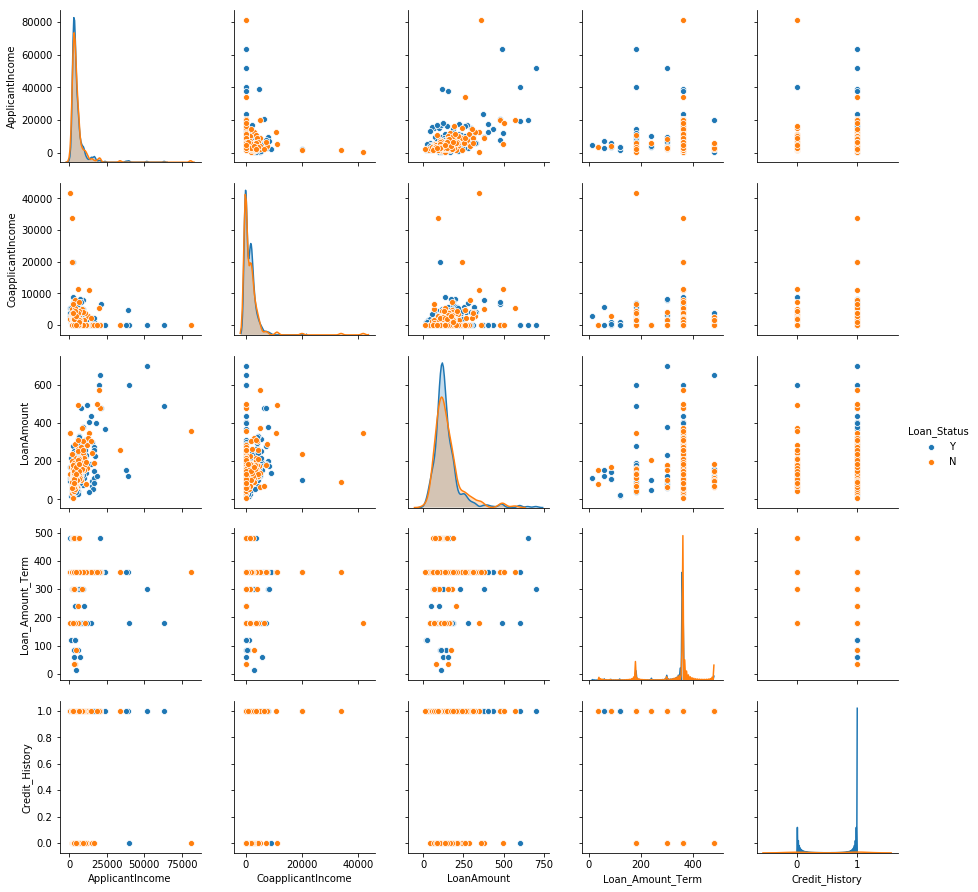

In [12]:
sn.pairplot(df,hue='Loan_Status')

 <font color =blue > **Heat plot to look at the correlation between features**</font>

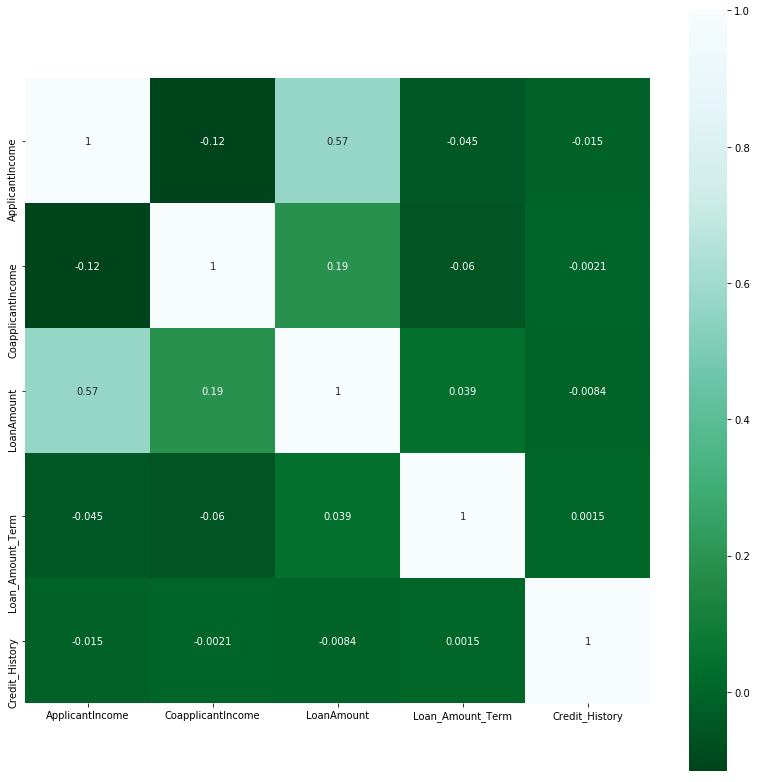

In [13]:
plt.figure(figsize=(14,14))
sn.heatmap(df.iloc[:,0:13].corr(), cbar = True,  square = True, annot=True, cmap= 'BuGn_r')

<font color =blue> count plots </font>

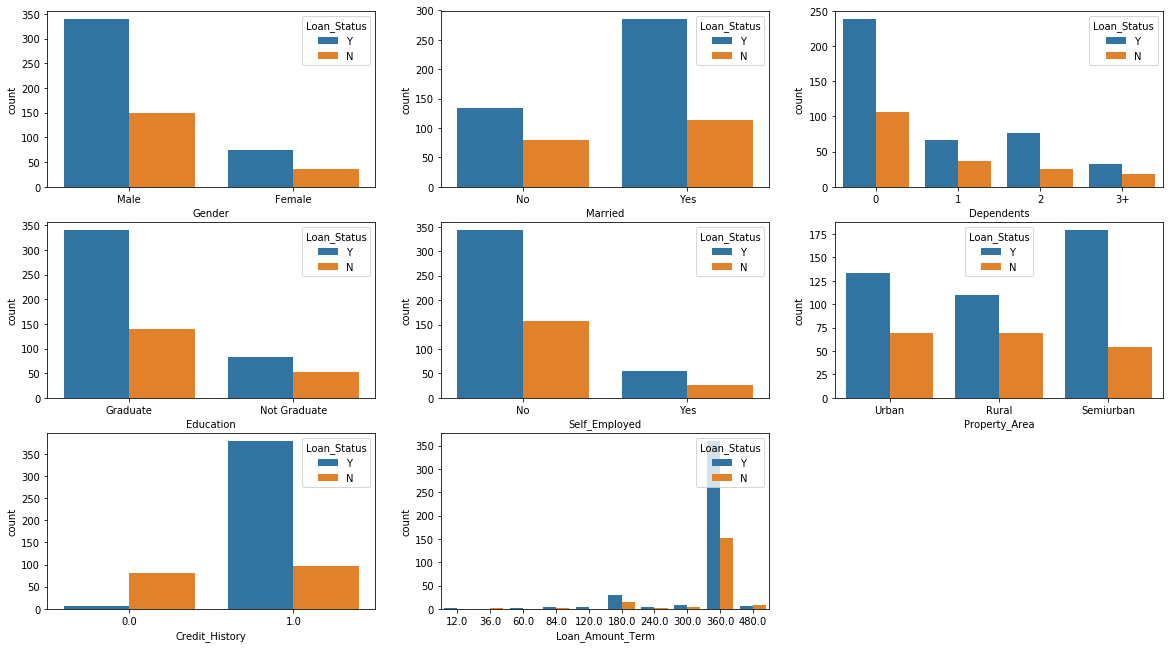

In [14]:

categories = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Credit_History","Loan_Amount_Term"]

fig = plt.figure(figsize=(20,11))

for i in range(len(categories)):
    ax = fig.add_subplot(3,3,i+1)
    sn.countplot(x=categories[i], hue = 'Loan_Status', data = df)

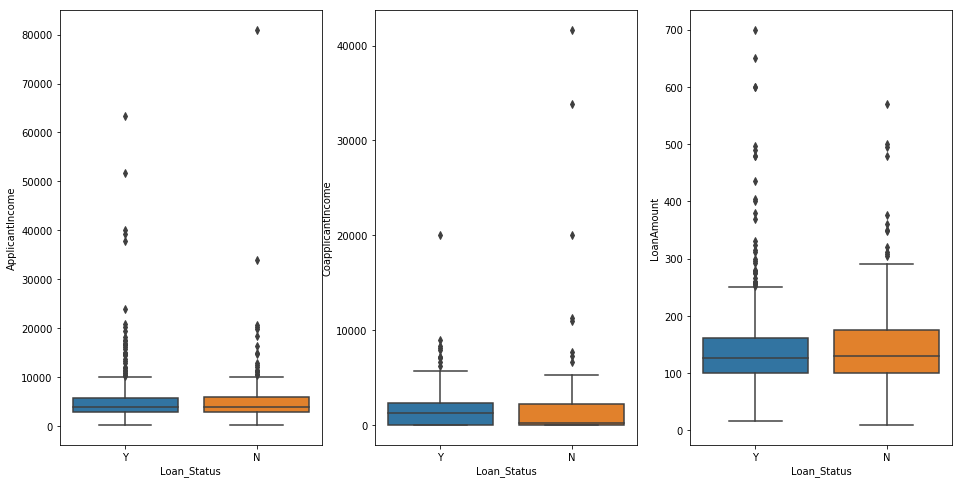

In [15]:
numerical = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

fig = plt.figure(figsize=(16,8))

for i in range(len(numerical)):
    ax = fig.add_subplot(1,3,i+1)
    sn.boxplot(y=numerical[i], x='Loan_Status', data = df)


In [16]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [55]:
# divide data into predictors and target

X = train_df_encoded.drop(["Loan_Status_Y"], axis=1)

y = train_df_encoded["Loan_Status_Y"]

X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001003',
       'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008',
       'Loan_ID_LP001011',
       ...
       'Loan_ID_LP002990', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object', length=627)

In [63]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle = True)


In [64]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test = imp_train.transform(X_test)

y_test.shape

(123,)

In [78]:
# Perform modeling on (x_train,y_train) using RandomForestClassifier, GradientBoostingClassifier, XGBClassifier, DecisionTreeClassifier, ExtraTreesClassifier, KNeighborsClassifier												
# Create default classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
gbm = GradientBoostingClassifier()
etc = ExtraTreesClassifier(n_estimators=100)
knc = KNeighborsClassifier()


In [79]:
# Train data
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)
etc1 = etc.fit(X_train,y_train)
knc1 = knc.fit(X_train,y_train)

In [76]:
#Make predictions on test (x_test) for each one of the models. Compare the output of predictions in each case with actual (y_test)

y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_gbm= gbm1.predict(X_test)
y_pred_etc= etc1.predict(X_test)
y_pred_knc= knc1.predict(X_test)

<font color=blue>**Confusion matrix**</font>

In [75]:
#Draw Confusion matrix

cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_gbm = confusion_matrix(y_test,y_pred_gbm)
cm_etc = confusion_matrix(y_test,y_pred_etc)
cm_knc = confusion_matrix(y_test,y_pred_knc)

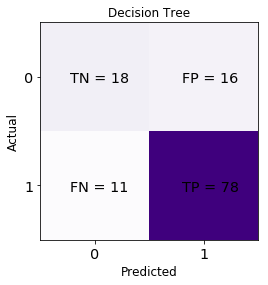

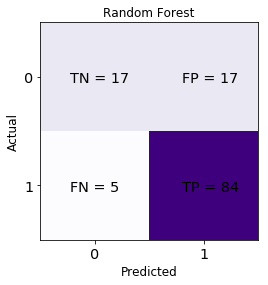

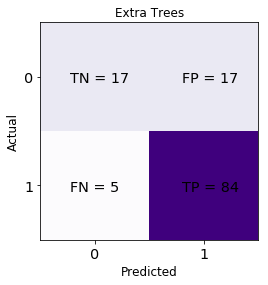

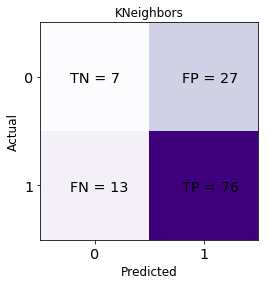

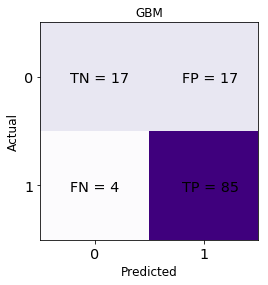

In [74]:
def plot_confusion_matrix(cm, classifier):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)

    classNames = ['0','1']

    plt.ylabel('Actual', size='large')

    plt.xlabel('Predicted', size='large')

    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, size='x-large')

    plt.yticks(tick_marks, classNames, size='x-large')

    s = [['TN','FP'], ['FN', 'TP']]

    plt.text(-0.23,0.05, str(s[0][0])+" = "+str(cm[0][0]), size='x-large')
    plt.text(0.8,0.05, str(s[0][1])+" = "+str(cm[0][1]), size='x-large')
    plt.text(-0.23,1.05, str(s[1][0])+" = "+str(cm[1][0]), size='x-large')
    plt.text(0.8,1.05, str(s[1][1])+" = "+str(cm[1][1]), size='x-large')
    plt.title(classifier)
    plt.show()

plot_confusion_matrix(cm_dt, "Decision Tree")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_etc, "Extra Trees")
plot_confusion_matrix(cm_knc, "KNeighbors")
plot_confusion_matrix(cm_gbm, "GBM")

In [73]:
print("Accuracy with Decision tree :",accuracy_score(y_test,y_pred_dt))
print("Accuracy with Radom Forest  :",accuracy_score(y_test,y_pred_rf))
print("Accuracy with GBM           :",accuracy_score(y_test,y_pred_gbm))
print("Accuracy with Extra Trees   :",accuracy_score(y_test,y_pred_etc))
print("Accuracy with K Neighbour   :",accuracy_score(y_test,y_pred_knc))

Accuracy with Decision tree : 0.7804878048780488
Accuracy with Radom Forest  : 0.8211382113821138
Accuracy with GBM           : 0.8292682926829268
Accuracy with Extra Trees   : 0.8211382113821138
Accuracy with K Neighbour   : 0.6747967479674797


<font color=purple>**GBM (Gradian Boosting Mahines)model give high Accuracy followed by Extra Trees and Decision Tree Model**</font>

In [72]:
# Get probability values
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_gbm_prob= gbm1.predict_proba(X_test)
y_pred_etc_prob = etc1.predict_proba(X_test)
y_pred_knc_prob= knc1.predict_proba(X_test)

In [71]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 y_pred_dt_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test,
                                 y_pred_gbm_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_etc, tpr_etc,thresholds = roc_curve(y_test,
                                 y_pred_etc_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_knc, tpr_knc,thresholds = roc_curve(y_test,
                                 y_pred_knc_prob[: , 1],
                                 pos_label= 1
                                 )

In [70]:
# Get AUC values
print("Decision Tree: ",auc(fpr_dt,tpr_dt))
print("Random Forest: ",auc(fpr_rf,tpr_rf))
print("GBM          : ",auc(fpr_gbm,tpr_gbm))
print("Extra Trees  : ",auc(fpr_etc,tpr_etc))
print("KNeighbors   : ",auc(fpr_knc,tpr_knc))

Decision Tree:  0.7216117216117216
Random Forest:  0.7422161172161172
GBM          :  0.7605311355311356
Extra Trees  :  0.7644993894993896
KNeighbors   :  0.5483821733821734


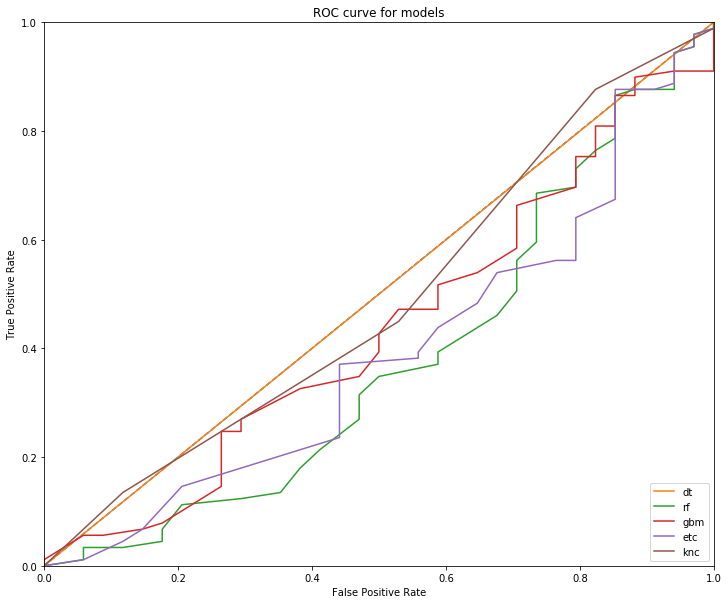

In [77]:
#Plot ROC curve now

fig = plt.figure(figsize=(12,10))   # Create window frame
ax = fig.add_subplot(111)   # Create axes

# Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")  # Dashed diagonal line

# Labels 
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

# Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Plot each graph now
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
#ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")
ax.plot(fpr_etc, tpr_etc, label = "etc")
ax.plot(fpr_knc, tpr_knc, label = "knc")

# Set legend and show plot
ax.legend(loc="lower right")
plt.show()

<font color=purple>**Based on AUC (Area under the ROC Curve)Value Extra Trees and GBM Model(slight lesser value) are better models followed 
by Rando forest and Decision Tree models** </font>